In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE ,RFECV
from sklearn.feature_selection import SelectKBest,SelectPercentile,chi2
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,precision_recall_curve
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split,StratifiedKFold

In [161]:
data= pd.read_csv("EDHS2019.csv",sep=',',index_col='id')

In [162]:
#Preprocessing
#Exploratory Data Analysis

In [163]:
data.sort_index()

,caseid,midx,age_mother,region,place_residence,mother_educ,source_drink_water,toilet_facility,electricity,radio,...,water_piped,toile_improved,electriciti,radioi,televisioni,head_fem,telephonei,wealth_indexi,child_fem,VitaminA
id,,,,,,,,,,,,,,,,,,,,,
3,00010021 02,1,26,tigray,urban,secondary,piped into dwelling,pit latrine with slab,yes,no,...,1,0,1,0,1,0,0,5,1,0
4,00010047 02,1,28,tigray,urban,secondary,piped into dwelling,pit latrine without slab/open pit,yes,no,...,1,0,1,0,1,0,0,5,1,1
5,00010054 02,1,27,tigray,urban,secondary,piped to yard/plot,pit latrine with slab,yes,no,...,1,0,1,0,1,0,0,5,0,1
6,00010060 02,1,32,tigray,urban,higher,piped into dwelling,flush to piped sewer system,yes,yes,...,1,1,1,1,1,0,1,5,1,1
8,00010073 02,1,36,tigray,urban,secondary,piped to yard/plot,pit latrine with slab,yes,no,...,1,0,1,0,1,0,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,00320018 01,3,25,afar,rural,no education,unprotected well,no facility/bush/field,no,no,...,0,0,0,0,0,1,0,1,1,1
5239,00400085 02,3,25,afar,rural,no education,river/dam/lake/ponds/stream/canal/irrigation c...,no facility/bush/field,no,no,...,0,0,0,0,0,0,0,1,1,0
5271,01100010 02,3,25,oromia,rural,no education,protected spring,no facility/bush/field,no,no,...,0,0,0,0,0,0,0,3,1,1


In [164]:
data.shape

(3161, 39)

In [165]:
# Find columns with missing values
missing_cols = data.columns[data.isnull().any()]

In [166]:
print("Columns with missing values:")
print(missing_cols)

Columns with missing values:
Index(['number_anc'], dtype='object')


In [167]:
# Count missing values in each column
missing_values_count = data[missing_cols].isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_values_count)


Number of missing values in each column:
number_anc    325
dtype: int64


In [168]:
# Find the mode of the 'number_anc' column to impute missing values
mode_anc = data['number_anc'].mode()[0] 

# Impute missing values in 'number_anc' with the mode
data['number_anc'].fillna(mode_anc, inplace=True) 

C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_1992\2516322516.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['number_anc'].fillna(mode_anc, inplace=True)


In [169]:
print(data.isnull().sum())

caseid                 0
midx                   0
age_mother             0
region                 0
place_residence        0
mother_educ            0
source_drink_water     0
toilet_facility        0
electricity            0
radio                  0
television             0
religion               0
num_under5_children    0
sex_head               0
age_head               0
telephone              0
cooking_fuel           0
wealth_index           0
birth_order            0
sex_child              0
duration_bfeeding      0
numb_month_bf          0
number_anc             0
place_delivery         0
Vitamin_A              0
age_child_months       0
region_i               0
rural                  0
mother_edu             0
water_piped            0
toile_improved         0
electriciti            0
radioi                 0
televisioni            0
head_fem               0
telephonei             0
wealth_indexi          0
child_fem              0
VitaminA               0
dtype: int64


In [170]:
data.isnull().sum().sum()

0

In [171]:
data.columns

Index(['caseid', 'midx', 'age_mother', 'region', 'place_residence',
       'mother_educ', 'source_drink_water', 'toilet_facility', 'electricity',
       'radio', 'television', 'religion', 'num_under5_children', 'sex_head',
       'age_head', 'telephone', 'cooking_fuel', 'wealth_index', 'birth_order',
       'sex_child', 'duration_bfeeding', 'numb_month_bf', 'number_anc',
       'place_delivery', 'Vitamin_A', 'age_child_months', 'region_i', 'rural',
       'mother_edu', 'water_piped', 'toile_improved', 'electriciti', 'radioi',
       'televisioni', 'head_fem', 'telephonei', 'wealth_indexi', 'child_fem',
       'VitaminA'],
      dtype='object')

In [172]:
print(data.head())

             caseid  midx  age_mother  region place_residence mother_educ  \
id                                                                          
3       00010021 02     1          26  tigray           urban   secondary   
4       00010047 02     1          28  tigray           urban   secondary   
5       00010054 02     1          27  tigray           urban   secondary   
6       00010060 02     1          32  tigray           urban      higher   
8       00010073 02     1          36  tigray           urban   secondary   

     source_drink_water                    toilet_facility electricity radio  \
id                                                                             
3   piped into dwelling              pit latrine with slab         yes    no   
4   piped into dwelling  pit latrine without slab/open pit         yes    no   
5    piped to yard/plot              pit latrine with slab         yes    no   
6   piped into dwelling        flush to piped sewer system  

In [173]:
# Drop the non-relevant columns (duplicated, non-numeric forms)
columns_to_drop = ['caseid', 'midx', 'region', 'place_residence', 'mother_educ', 
                  'source_drink_water', 'toilet_facility', 'electricity', 
                  'radio', 'television', 'religion', 'num_under5_children', 
                  'sex_head', 'telephone', 'cooking_fuel', 'wealth_index', 
                  'sex_child', 'duration_bfeeding']
data = data.drop(columns=columns_to_drop)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_mother        3161 non-null   int64 
 1   age_head          3161 non-null   int64 
 2   birth_order       3161 non-null   int64 
 3   numb_month_bf     3161 non-null   object
 4   number_anc        3161 non-null   object
 5   place_delivery    3161 non-null   object
 6   Vitamin_A         3161 non-null   object
 7   age_child_months  3161 non-null   int64 
 8   region_i          3161 non-null   int64 
 9   rural             3161 non-null   int64 
 10  mother_edu        3161 non-null   int64 
 11  water_piped       3161 non-null   int64 
 12  toile_improved    3161 non-null   int64 
 13  electriciti       3161 non-null   int64 
 14  radioi            3161 non-null   int64 
 15  televisioni       3161 non-null   int64 
 16  head_fem          3161 non-null   int64 
 17  telephonei        3

In [175]:
## Change object variables into numeric
data['number_anc'] = pd.to_numeric(data['number_anc'], errors='coerce')

In [176]:
#Feature Engineering
# Create a list of values for 'place_delivery' that should be categorized as 'facility_deliv'
facility_deliv_values = [21, 22, 23, 26, 31, 32, 41, 46]

# Create a new column 'facility_deliv' 
data['facility_deliv'] = data['place_delivery'].isin(facility_deliv_values).astype(int)

# Now, 'facility_deliv' will have 1 if 'place_delivery' is in the list, and 0 otherwise.

In [177]:
data = data.drop(columns=['place_delivery', 'Vitamin_A','numb_month_bf']) 

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_mother        3161 non-null   int64  
 1   age_head          3161 non-null   int64  
 2   birth_order       3161 non-null   int64  
 3   number_anc        2099 non-null   float64
 4   age_child_months  3161 non-null   int64  
 5   region_i          3161 non-null   int64  
 6   rural             3161 non-null   int64  
 7   mother_edu        3161 non-null   int64  
 8   water_piped       3161 non-null   int64  
 9   toile_improved    3161 non-null   int64  
 10  electriciti       3161 non-null   int64  
 11  radioi            3161 non-null   int64  
 12  televisioni       3161 non-null   int64  
 13  head_fem          3161 non-null   int64  
 14  telephonei        3161 non-null   int64  
 15  wealth_indexi     3161 non-null   int64  
 16  child_fem         3161 non-null   int64  
 17  

In [179]:
print(data.index)

Index([   3,    4,    5,    6,    8,    9,   10,   11,   12,   14,
       ...
       5196, 5205, 5208, 5209, 5213, 5218, 5239, 5271, 5321, 5374],
      dtype='int64', name='id', length=3161)


In [180]:
# Save the changes to the dataset
data.to_csv('EDHS2019_Final.csv') 

print("EDHS2019_final.csv has been saved successfully!")

EDHS2019_final.csv has been saved successfully!


In [181]:
# Print summary statistics
data.describe()

,age_mother,age_head,birth_order,number_anc,age_child_months,region_i,rural,mother_edu,water_piped,toile_improved,electriciti,radioi,televisioni,head_fem,telephonei,wealth_indexi,child_fem,VitaminA,facility_deliv
count,3161.000000,3161.000000,3161.000000,2099.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.0
mean,27.877887,36.540968,3.640620,3.910910,16.907308,5.599177,0.761784,0.483391,0.458083,0.071813,0.299272,0.241379,0.190446,0.199304,0.017083,2.774755,0.493831,0.380576,0.0
std,6.275653,11.099734,2.377621,1.803283,10.316047,2.999639,0.426059,0.499803,0.498319,0.258218,0.458012,0.427987,0.392715,0.399540,0.129602,1.578497,0.500041,0.485605,0.0
min,15.000000,15.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
25%,23.000000,29.000000,2.000000,3.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
50%,27.000000,35.000000,3.000000,4.000000,17.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0
75%,31.000000,40.000000,5.000000,5.000000,26.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.0
max,49.000000,90.000000,15.000000,20.000000,36.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,0.0


In [182]:
# Create a copy of the DataFrame to avoid modifying the original data
df = data.copy()

# Rename values in the 'VitaminA' column just for the plot
df['VitaminA'] = df['VitaminA'].replace({0: 'No', 1: 'Yes'})
# Rename values in the 'child_fem' column
df['child_fem'] = df['child_fem'].replace({0: 'Male', 1: 'Female'})

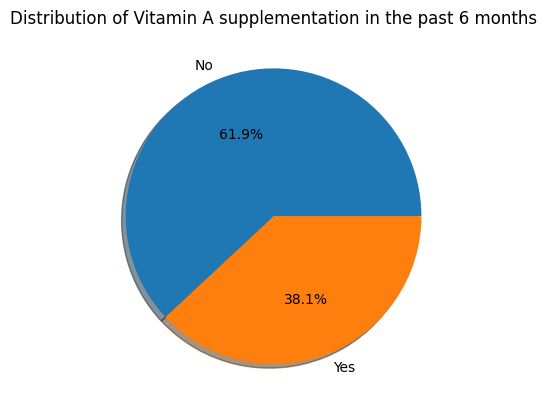

In [183]:
# Create a pie chart of the distribution of Vitamin A supplementation
result_counts = df['VitaminA'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Vitamin A supplementation in the past 6 months')
plt.show()

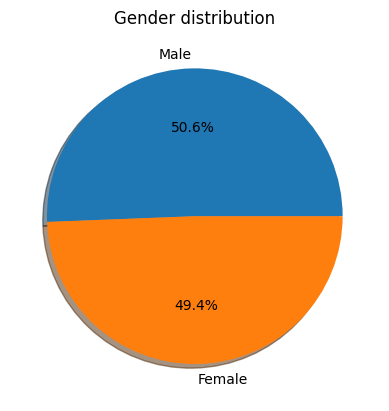

In [184]:
result_counts = df['child_fem'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%',  shadow=True)
plt.title('Gender distribution')
plt.show()

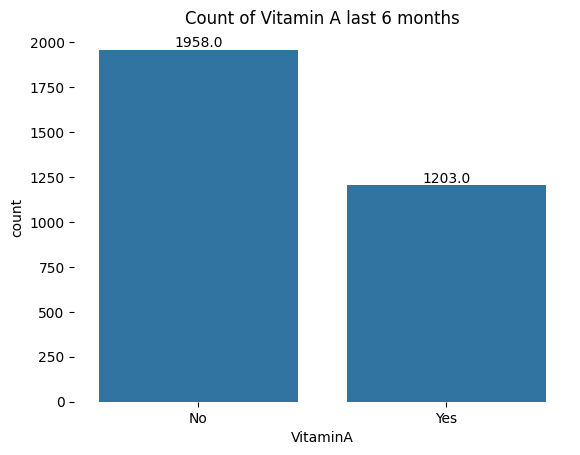

In [185]:
# Plotting the count of Vitamin A supplementation
ax = sns.countplot(x="VitaminA", data=df) 
plt.title('Count of Vitamin A last 6 months')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='bottom')

# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

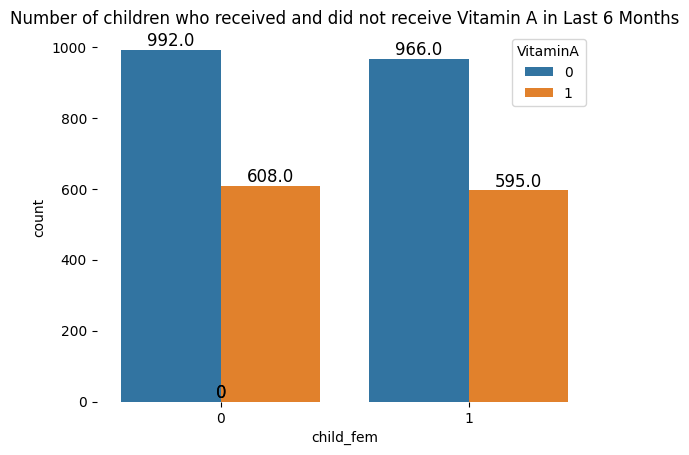

In [186]:
ax = sns.countplot(x='child_fem', hue='VitaminA', data=data)
plt.title('Number of children who received and did not receive Vitamin A in Last 6 Months')

# Add count values to the bars
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f"{height}", 
              xy=(p.get_x() + p.get_width() / 2, height),
              ha='center',
              va='bottom',
              fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

In [187]:
df.info() #Data used to generate the plots (modified child_fem and VitaminA to Object)

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_mother        3161 non-null   int64  
 1   age_head          3161 non-null   int64  
 2   birth_order       3161 non-null   int64  
 3   number_anc        2099 non-null   float64
 4   age_child_months  3161 non-null   int64  
 5   region_i          3161 non-null   int64  
 6   rural             3161 non-null   int64  
 7   mother_edu        3161 non-null   int64  
 8   water_piped       3161 non-null   int64  
 9   toile_improved    3161 non-null   int64  
 10  electriciti       3161 non-null   int64  
 11  radioi            3161 non-null   int64  
 12  televisioni       3161 non-null   int64  
 13  head_fem          3161 non-null   int64  
 14  telephonei        3161 non-null   int64  
 15  wealth_indexi     3161 non-null   int64  
 16  child_fem         3161 non-null   object 
 17  

In [188]:
data.info() #Original data

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_mother        3161 non-null   int64  
 1   age_head          3161 non-null   int64  
 2   birth_order       3161 non-null   int64  
 3   number_anc        2099 non-null   float64
 4   age_child_months  3161 non-null   int64  
 5   region_i          3161 non-null   int64  
 6   rural             3161 non-null   int64  
 7   mother_edu        3161 non-null   int64  
 8   water_piped       3161 non-null   int64  
 9   toile_improved    3161 non-null   int64  
 10  electriciti       3161 non-null   int64  
 11  radioi            3161 non-null   int64  
 12  televisioni       3161 non-null   int64  
 13  head_fem          3161 non-null   int64  
 14  telephonei        3161 non-null   int64  
 15  wealth_indexi     3161 non-null   int64  
 16  child_fem         3161 non-null   int64  
 17  

In [189]:
# Calculate the share of children who took VitaminA by child_fem
mean_vit_A_by_gender = data.groupby("child_fem")["VitaminA"].mean().round(3)

print(mean_vit_A_by_gender)

child_fem
0    0.380
1    0.381
Name: VitaminA, dtype: float64


C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_1992\1847292739.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])
C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_1992\1847292739.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])


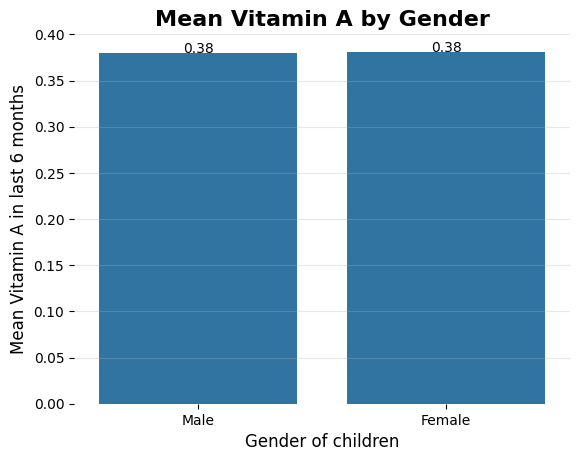

<Figure size 800x600 with 0 Axes>

In [190]:
Vit_A_gender = data.groupby('child_fem')['VitaminA'].mean().reset_index()
# Create the bar plot
ax = sns.barplot(x='child_fem', y='VitaminA', data=Vit_A_gender)

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.2f}'.format(p.get_height()), ha='center')
    ax.set_xticklabels(['Male', 'Female'])
    
# Add plot titles and labels
plt.title('Mean Vitamin A by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender of children' , fontsize=12)
plt.ylabel('Mean Vitamin A in last 6 months' , fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)

plt.figure(figsize=(8, 6))
# Show the plot
plt.show()

In [191]:
#Statistical test

#T-test
from scipy.stats import ttest_ind

In [192]:
# Vitamin A by gender
male_vitA = data.loc[data['child_fem'] == 0, 'VitaminA']
female_vitA = data.loc[data['child_fem'] == 1, 'VitaminA']

# Compute the t-test statistic and p-value
t_statistic, p_value = ttest_ind(male_vitA, female_vitA)

# Print the results
print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Gender has an impact on impact on the probability of Vitamin A supplementation.")
else:
    print("Fail to reject null hypothesis: Gender has no impact on the probability of Vitamin A supplementation.")

T-Statistic: -0.07
P-Value: 0.946
Fail to reject null hypothesis: Gender has no impact on the probability of Vitamin A supplementation.


In [193]:
#!pip install statsmodels

In [194]:
import statsmodels.api as sm

In [195]:
#ODDS ratio
# Create binary variables for gender and VitA status
data['is_female'] = np.where(data['child_fem'] == 1, 1, 0)
data['took_vita'] = np.where(data['VitaminA'] == 1, 1, 0)

# Fit a logistic regression model with gender and VitA status as predictors
logit_model = sm.Logit(data['took_vita'], sm.add_constant(data['is_female']))
result = logit_model.fit()

# Print the odds ratio for gender
print("Odds Ratio for Gender: {:.2f}".format(np.exp(result.params[1])))

Optimization terminated successfully.
         Current function value: 0.664345
         Iterations 4
Odds Ratio for Gender: 1.00


C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_1992\686604482.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Odds Ratio for Gender: {:.2f}".format(np.exp(result.params[1])))


In [196]:
#CHI-SQUARE
from scipy.stats import chi2_contingency

In [197]:

# Create a contingency table of gender and VitA status
cont_table = pd.crosstab(data['child_fem'], data['VitaminA'])

# Perform the chi-square test of independence
chi2_statistic, p_value, dof, expected = chi2_contingency(cont_table)

# Print the results
print("Chi-Square Statistic: {:.2f}".format(chi2_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Gender and Vitamin A supplementation status are dependent.")
else:
    print("Fail to reject null hypothesis: Gender and Vitamin A supplementation status are independent.")

Chi-Square Statistic: 0.00
P-Value: 0.975
Fail to reject null hypothesis: Gender and Vitamin A supplementation status are independent.


#Feature Selection

In order to improve model's performance and interpretability by reducing the number of less important 
attributes. In supervised ML methods the feature selecction can be done through wrapper, filter and intrinsic. 
The study incorporated correlation, SelectKBest and Extra Tree Classifier.

Correlation
Pearson correlation matrixis is used.

In [198]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_mother        3161 non-null   int64  
 1   age_head          3161 non-null   int64  
 2   birth_order       3161 non-null   int64  
 3   number_anc        2099 non-null   float64
 4   age_child_months  3161 non-null   int64  
 5   region_i          3161 non-null   int64  
 6   rural             3161 non-null   int64  
 7   mother_edu        3161 non-null   int64  
 8   water_piped       3161 non-null   int64  
 9   toile_improved    3161 non-null   int64  
 10  electriciti       3161 non-null   int64  
 11  radioi            3161 non-null   int64  
 12  televisioni       3161 non-null   int64  
 13  head_fem          3161 non-null   int64  
 14  telephonei        3161 non-null   int64  
 15  wealth_indexi     3161 non-null   int64  
 16  child_fem         3161 non-null   int64  
 17  

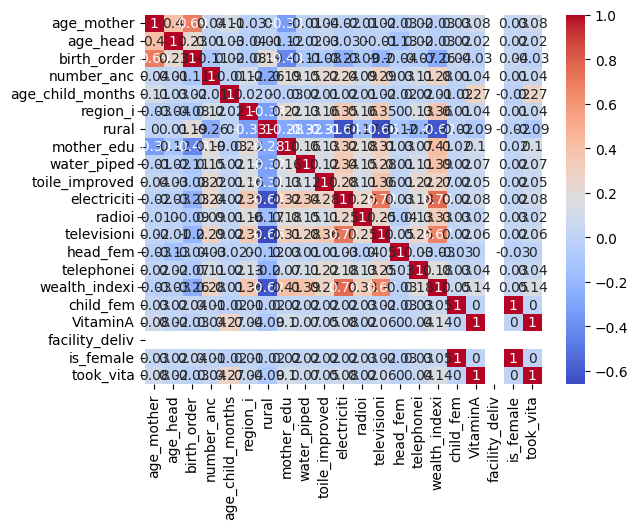

In [199]:
corr_matrix = data.corr().round(2)
# plot the correlation matrix using a heatmap from seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
#plt.title('Correlation Matrix', fontweight='bold')
plt.show()

In [210]:
# Find the mode of the 'number_anc' column to impute missing values
mode_anc = data['number_anc'].mode()[0] 

# Impute missing values in 'number_anc' with the mode
data['number_anc'].fillna(mode_anc, inplace=True) 

C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_1992\2516322516.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['number_anc'].fillna(mode_anc, inplace=True)


In [226]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = data[['child_fem', 'age_child_months', 'birth_order', 'number_anc','age_mother', 'age_head',
                        'region_i','rural', 'mother_edu', 'water_piped', 'toile_improved', 'electriciti', 
                        'radioi', 'head_fem', 'telephonei', 'wealth_indexi', 'VitaminA']].corr()

# Get the correlation of all features with 'VitaminA'
correlation_with_vitamina = correlation_matrix['VitaminA']

# Sort the correlations in descending order and select the top 10
top_10_correlations = correlation_with_vitamina.sort_values(ascending=False).head(20)

print(top_10_correlations)

VitaminA            1.000000
age_child_months    0.274067
wealth_indexi       0.142419
mother_edu          0.095808
age_mother          0.077767
electriciti         0.076798
water_piped         0.069214
toile_improved      0.049489
telephonei          0.042483
region_i            0.038277
number_anc          0.030221
age_head            0.024671
radioi              0.020739
head_fem            0.002018
child_fem           0.001201
birth_order        -0.025124
rural              -0.093954
Name: VitaminA, dtype: float64


In [201]:
#Splitting data into Training and Testing samples

We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. We split 80% of data as training data and the rest 20% is used as testing data.

In [212]:
data.columns

Index(['age_mother', 'age_head', 'birth_order', 'number_anc',
       'age_child_months', 'region_i', 'rural', 'mother_edu', 'water_piped',
       'toile_improved', 'electriciti', 'radioi', 'televisioni', 'head_fem',
       'telephonei', 'wealth_indexi', 'child_fem', 'VitaminA',
       'facility_deliv', 'is_female', 'took_vita'],
      dtype='object')

In [227]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the selected feature only 
X = data.drop(['facility_deliv', 'is_female', 'took_vita', 'VitaminA', 'toile_improved', 'telephonei', 'region_i', 'birth_order', 'head_fem', 'radioi', 'age_head', 'number_anc', 'televisioni'],axis=1)
y = data['VitaminA']

In [228]:
X

,age_mother,age_child_months,rural,mother_edu,water_piped,electriciti,wealth_indexi,child_fem
id,,,,,,,,
3,26,2,0,1,1,1,5,1
4,28,25,0,1,1,1,5,1
5,27,8,0,1,1,1,5,0
6,32,21,0,1,1,1,5,1
8,36,13,0,1,1,1,5,0
...,...,...,...,...,...,...,...,...
5218,25,29,1,0,0,0,1,1
5239,25,29,1,0,0,0,1,1
5271,25,31,1,0,0,0,3,1


In [229]:
y

id
3       0
4       1
5       1
6       1
8       1
       ..
5218    1
5239    0
5271    1
5321    1
5374    1
Name: VitaminA, Length: 3161, dtype: int64

In [230]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=101)

In [231]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (2528, 8)
y_train -  (2528,)
X_test -  (633, 8)
y_test -  (633,)


Baseline for models
We will train four types of classifiers and decide which classifier will be more effective in detecting anemic condition.

We will use: Classification Models

Logistic Regression
Decision Trees
Random Forest
Naive Bayes Classifier
SVM
Model Building
We are aware that our dataset is highly imbalanced, however, we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each regression models performance.

Logistic Regression

In [232]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step

In [233]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [234]:
# Predict from Test set

y_pred = logreg.predict(X_test)

In [235]:
# Model Evolution
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       403
           1       0.53      0.40      0.45       230

    accuracy                           0.65       633
   macro avg       0.61      0.60      0.60       633
weighted avg       0.64      0.65      0.64       633



In [236]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.65245
AUC : 0.59733
Precision : 0.52907
Recall : 0.39565
F1 : 0.45274




In [237]:
## Predicted values counts for VitaA as No and Yes of test dataset
pd.Series(y_pred).value_counts()

0    461
1    172
Name: count, dtype: int64

In [238]:
# Actual values counts for Vita A as No and Yes of test dataset
pd.Series(y_test).value_counts()

VitaminA
0    403
1    230
Name: count, dtype: int64

In [239]:
#Model Evolution Matrix
# confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[322,  81],
       [139,  91]], dtype=int64)

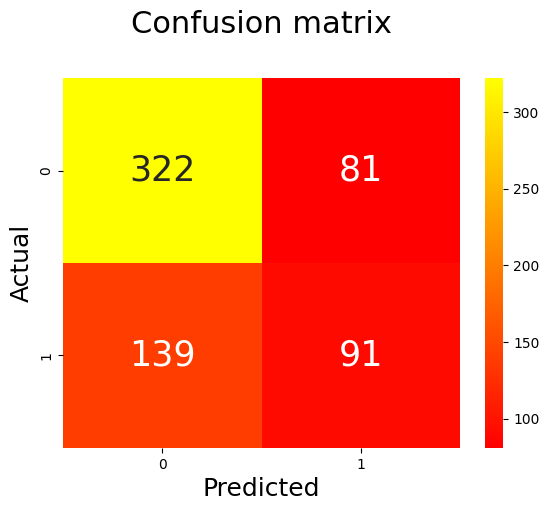

In [240]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="autumn" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [241]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.51244862, 0.48755138],
       [0.60829006, 0.39170994],
       [0.86613759, 0.13386241],
       ...,
       [0.73307752, 0.26692248],
       [0.37706674, 0.62293326],
       [0.67640746, 0.32359254]])

In [245]:
!pip install imblearn


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   --- ------------------------------------ 20.5/238.4 kB ? eta -:--:--
   ------------- ------------------------- 81.9/238.4 kB 127.5 k

In [246]:
# Import imbalace technique algorithims

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
#Logistic Regression with Random Undersampling technique

from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 1555, 1: 973})
Resampled dataset shape Counter({0: 973, 1: 973})


In [248]:
from sklearn.metrics import cohen_kappa_score 

In [249]:
# Undersampling with Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_rus)))

Accuracy :0.62085
AUC : 0.62104
Precision : 0.48311
Recall : 0.62174
F1 : 0.54373
Kappa Statistic : 0.22804


AUC -  0.6210432624878628 



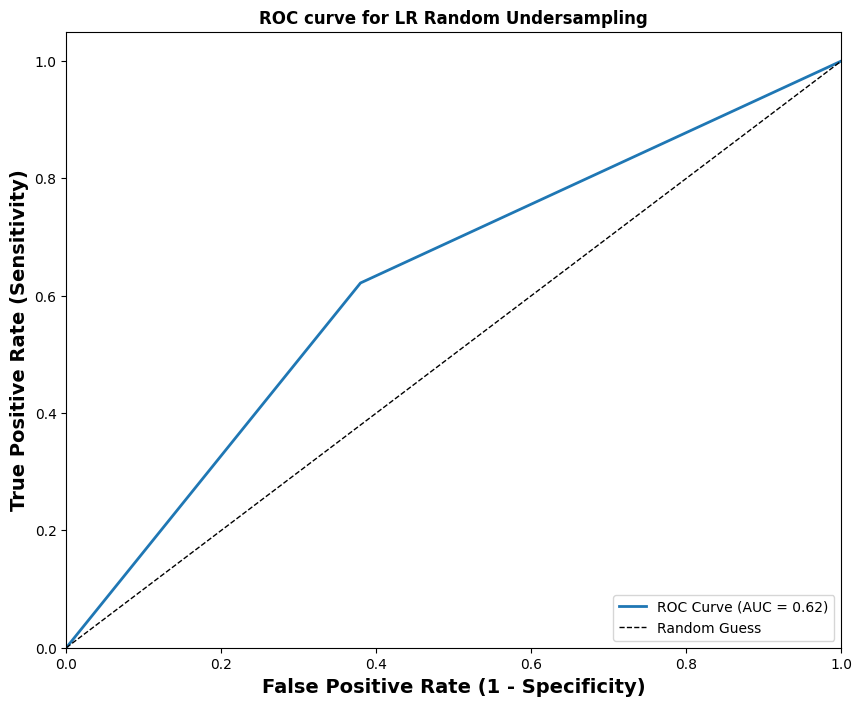

In [250]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Undersampling', fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()

f1=0.544


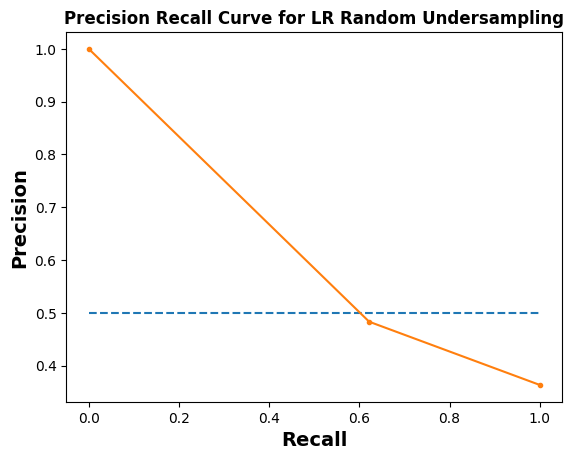

In [251]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_rus)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_rus)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Undersampling', fontsize=12, fontweight='bold')

# show the plot
plt.show()

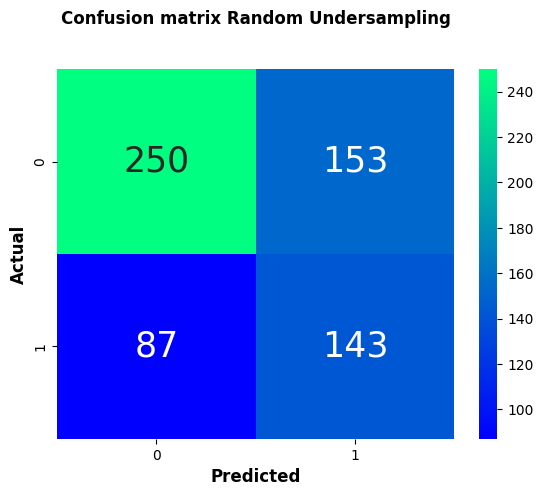

In [252]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix Random Undersampling', y=1.1, fontsize = 12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12, fontweight='bold')
plt.ylabel('Actual',fontsize = 12, fontweight='bold')

# ax.xaxis.set_ticklabels(['non anemic', 'anemic']); 
# ax.yaxis.set_ticklabels(['non anemic', 'anemic']);

plt.show()

In [ ]:
#Logistic Regression with Random Oversampling technique

In [253]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 1555, 1: 973})
Resampled dataset shape Counter({0: 1555, 1: 1555})


In [254]:
# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_ros))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_ros)))

Accuracy :0.62559
AUC : 0.62197
Precision : 0.48780
Recall : 0.60870
F1 : 0.54159
Kappa Statistic : 0.23161


AUC -  0.6219656920919193 



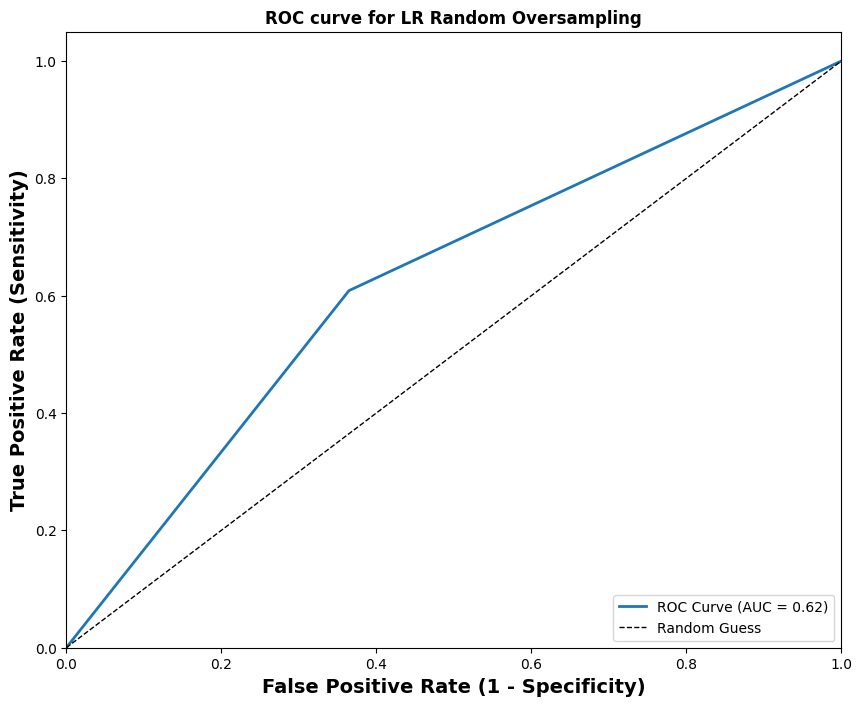

In [255]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Oversampling', fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()

f1=0.542


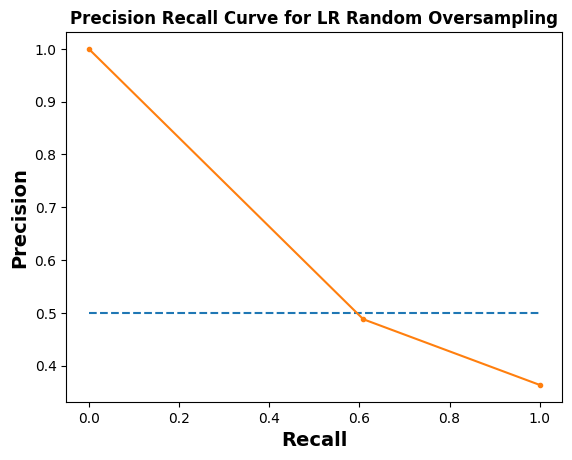

In [257]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_ros)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_ros)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')


# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Oversampling', fontsize=12, fontweight='bold')
# show the plot
plt.show()

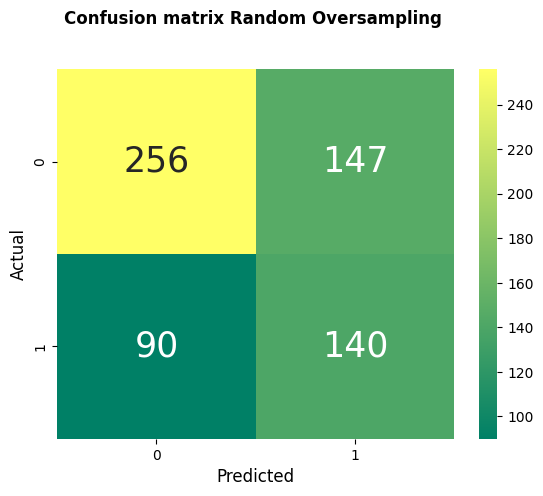

In [258]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="summer" ,fmt='g')

plt.title('Confusion matrix Random Oversampling ', y=1.1,  fontsize=12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)

# ax.xaxis.set_ticklabels(['non anemic', 'anemic']); 
# ax.yaxis.set_ticklabels(['non anemic', 'anemic']);

plt.show()

In [ ]:
#Logistic Regression with SMOTE data

In [259]:
from imblearn.over_sampling import SMOTE, ADASYN


print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 1555, 1: 973})
Resampled dataset shape Counter({0: 1555, 1: 1555})


In [260]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [261]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_smote)))

Accuracy :0.60348
AUC : 0.60180
Precision : 0.46441
Recall : 0.59565
F1 : 0.52190
Kappa Statistic : 0.19195


AUC -  0.6017963102815838 



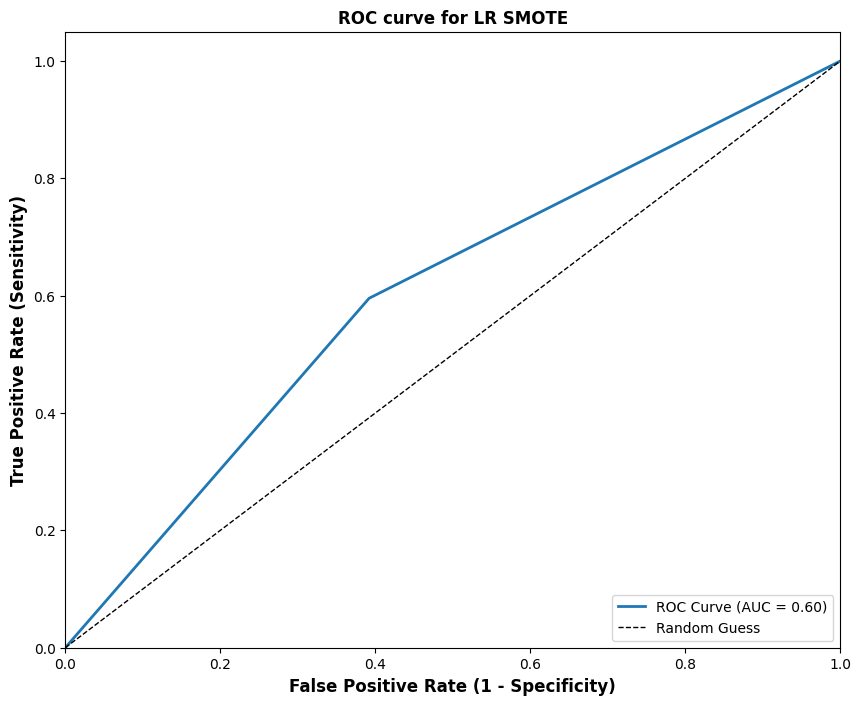

In [262]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)',  fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)',  fontsize=12, fontweight='bold')
plt.title('ROC curve for LR SMOTE',  fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()

f1=0.522


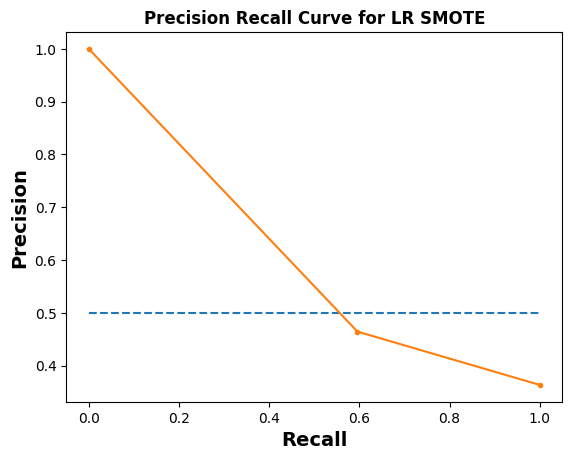

In [264]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR SMOTE', fontsize=12, fontweight='bold')
# show the plot
plt.show()

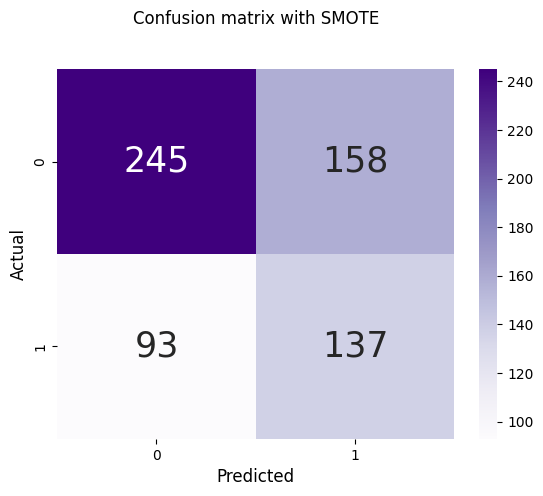

In [265]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="Purples" ,fmt='g')

plt.title('Confusion matrix with SMOTE', y=1.1, fontsize = 12)
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)



plt.show()

In [ ]:
#Logistic Regression with ADASYN data

In [266]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 1555, 1: 973})
Resampled dataset shape Counter({0: 1555, 1: 1498})


In [267]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_adasyn)))

Accuracy :0.81359
AUC : 0.59930
Precision : 0.46503
Recall : 0.57826
F1 : 0.51550
Kappa Statistic : 0.18874


AUC -  0.5993041320530802 



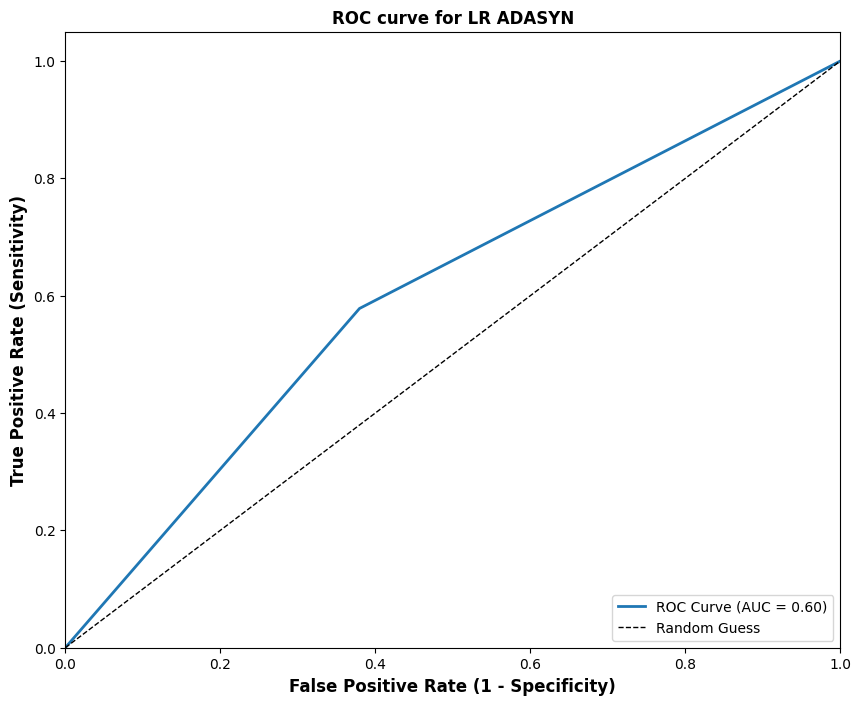

In [268]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12,fontweight='bold')
plt.title('ROC curve for LR ADASYN', fontsize=12,fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()

f1=0.516


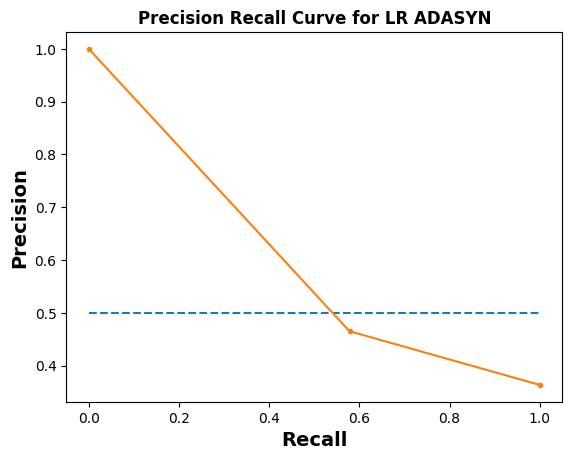

In [269]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_adasyn)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_adasyn)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR ADASYN', fontsize=12, fontweight='bold')

# show the plot
plt.show()

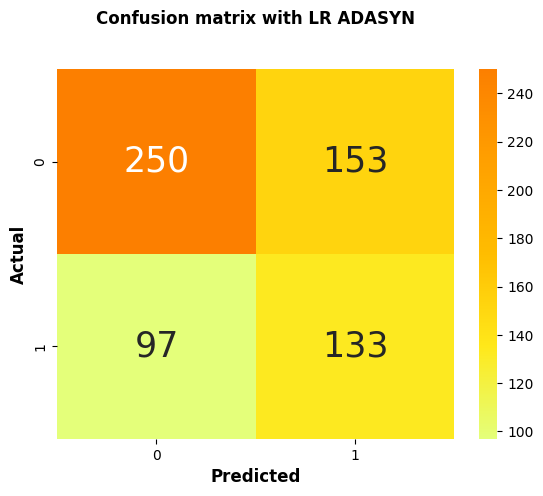

In [270]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_adasyn)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="Wistia" ,fmt='g')

plt.title('Confusion matrix with LR ADASYN', y=1.1, fontsize = 12,fontweight='bold')
plt.xlabel('Predicted',fontsize = 12,fontweight='bold')
plt.ylabel('Actual',fontsize = 12,fontweight='bold')


plt.show()

Distribution of balaced dataset
Building different models with different balanced datasets
Let's now try different models , first by creating multiple datasets for undersampled , oversampled and SMOTE sampled

In [274]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []
kappa_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)
         #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))
        
        
        # calculate kappa Statictis
        kappa = cohen_kappa_score(y_test, y_test_pred)
        kappa_lst.append(kappa)

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)
        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        
        print('Kappa Statistic : {0:0.5f}'.format(kappa))
        
        print('Confusion Matrix : \n', cnf_matrix)
        
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    #plt.title('ROC curve for Predicting a anemia cases')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

In [ ]:
#Decision Tree (DT)

In [276]:
from sklearn.tree import DecisionTreeClassifier

Model Name : DT imbalance
Train Accuracy :0.97389
Test Accuracy :0.61137
Train AUC : 0.96666
Test AUC : 0.58280
Train Precision : 0.99671
Test Precision : 0.46610
Train Recall : 0.93525
Test Recall : 0.47826
Train F1 : 0.96501
Test F1 : 0.47210
Kappa Statistic : 0.16468
Confusion Matrix : 
 [[277 126]
 [120 110]]


Model Name : DT Undersampling
Train Accuracy :0.97842
Test Accuracy :0.59242
Train AUC : 0.97842
Test AUC : 0.58378
Train Precision : 0.99893
Test Precision : 0.45035
Train Recall : 0.95786
Test Recall : 0.55217
Train F1 : 0.97796
Test F1 : 0.49609
Kappa Statistic : 0.15980
Confusion Matrix : 
 [[248 155]
 [103 127]]


Model Name : DT Oversampling
Train Accuracy :0.97814
Test Accuracy :0.62559
Train AUC : 0.97814
Test AUC : 0.60610
Train Precision : 0.97999
Test Precision : 0.48617
Train Recall : 0.97621
Test Recall : 0.53478
Train F1 : 0.97809
Test F1 : 0.50932
Kappa Statistic : 0.20774
Confusion Matrix : 
 [[273 130]
 [107 123]]


Model Name : DT SMOTE
Train Accuracy :0.97

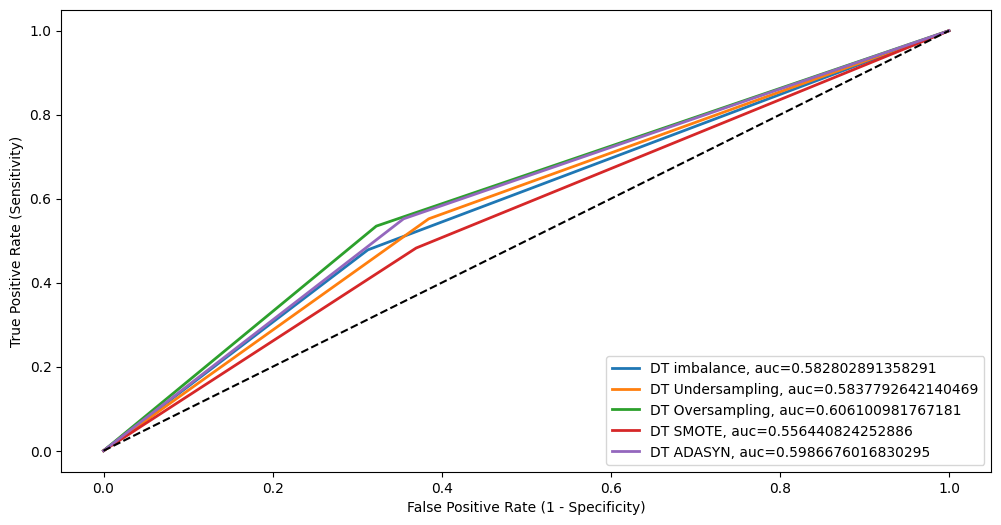

In [277]:
# Decision Tree (DT)
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X_train,y_train,X_test,y_test))
DTmodels.append(('DT Undersampling', dt,X_train_rus,y_train_rus,X_test,y_test))
DTmodels.append(('DT Oversampling', dt,X_train_ros,y_train_ros,X_test,y_test))
DTmodels.append(('DT SMOTE', dt,X_train_smote,y_train_smote,X_test,y_test))
DTmodels.append(('DT ADASYN', dt,X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

Random Forest (RF)

Model Name : RF imbalance
Train Accuracy :0.97389
Test Accuracy :0.62401
Train AUC : 0.97166
Test AUC : 0.59366
Train Precision : 0.96995
Test Precision : 0.48261
Train Recall : 0.96197
Test Recall : 0.48261
Train F1 : 0.96594
Test F1 : 0.48261
Kappa Statistic : 0.18732
Confusion Matrix : 
 [[284 119]
 [119 111]]


Model Name : RF Undersampling
Train Accuracy :0.97842
Test Accuracy :0.61611
Train AUC : 0.97842
Test AUC : 0.61919
Train Precision : 0.97940
Test Precision : 0.47855
Train Recall : 0.97739
Test Recall : 0.63043
Train F1 : 0.97840
Test F1 : 0.54409
Kappa Statistic : 0.22317
Confusion Matrix : 
 [[245 158]
 [ 85 145]]


Model Name : RF Oversampling
Train Accuracy :0.97814
Test Accuracy :0.62559
Train AUC : 0.97814
Test AUC : 0.60517
Train Precision : 0.97146
Test Precision : 0.48606
Train Recall : 0.98521
Test Recall : 0.53043
Train F1 : 0.97829
Test F1 : 0.50728
Kappa Statistic : 0.20629
Confusion Matrix : 
 [[274 129]
 [108 122]]


Model Name : RF SMOTE
Train Accuracy :0.97

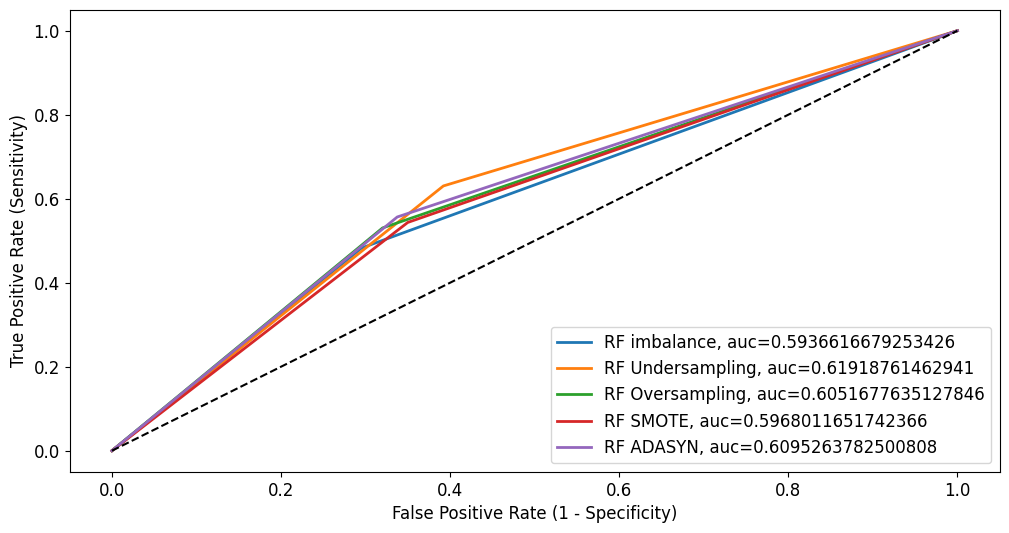

In [278]:
# Random Forest (RF) 
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

K-Nearest Neighbors (KNN)

In [280]:
from sklearn.neighbors import KNeighborsClassifier

Model Name : KNN imbalance
Train Accuracy :0.75356
Test Accuracy :0.59558
Train AUC : 0.73409
Test AUC : 0.56480
Train Precision : 0.69147
Test Precision : 0.44444
Train Recall : 0.64954
Test Recall : 0.45217
Train F1 : 0.66985
Test F1 : 0.44828
Kappa Statistic : 0.12911
Confusion Matrix : 
 [[273 130]
 [126 104]]


Model Name : KNN Undersampling
Train Accuracy :0.74101
Test Accuracy :0.60032
Train AUC : 0.74101
Test AUC : 0.60678
Train Precision : 0.73241
Test Precision : 0.46326
Train Recall : 0.75951
Test Recall : 0.63043
Train F1 : 0.74571
Test F1 : 0.53407
Kappa Statistic : 0.19821
Confusion Matrix : 
 [[235 168]
 [ 85 145]]


Model Name : KNN Oversampling
Train Accuracy :0.78617
Test Accuracy :0.59084
Train AUC : 0.78617
Test AUC : 0.59467
Train Precision : 0.76054
Test Precision : 0.45307
Train Recall : 0.83537
Test Recall : 0.60870
Train F1 : 0.79620
Test F1 : 0.51948
Kappa Statistic : 0.17634
Confusion Matrix : 
 [[234 169]
 [ 90 140]]


Model Name : KNN SMOTE
Train Accuracy :

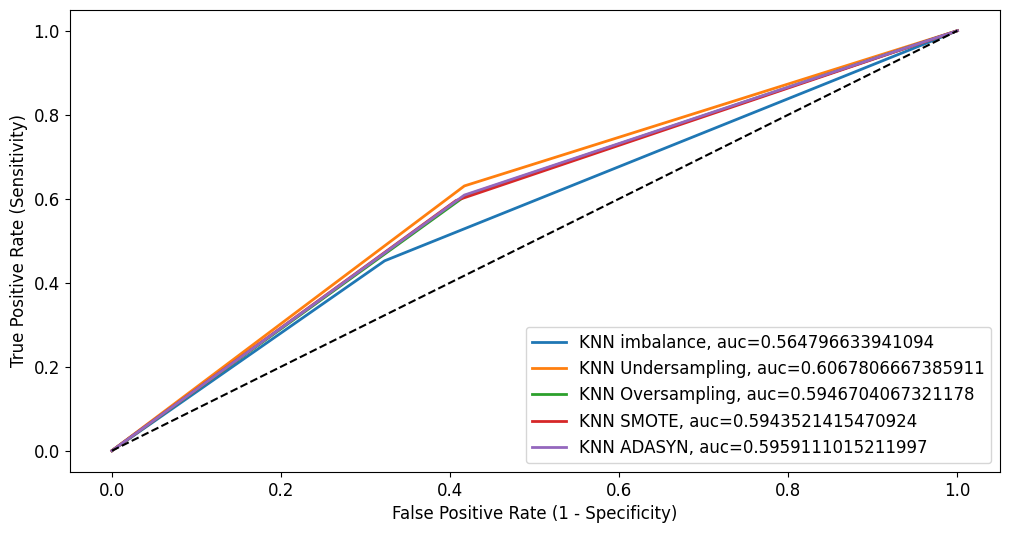

In [281]:
# K-Nearest Neighbors (KNN) 
KNNmodels = []

KNNmodels.append(('KNN imbalance', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodels.append(('KNN Undersampling', KNeighborsClassifier(),X_train_rus,y_train_rus,X_test,y_test))
KNNmodels.append(('KNN Oversampling', KNeighborsClassifier(),X_train_ros,y_train_ros,X_test,y_test))
KNNmodels.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote,y_train_smote,X_test,y_test))
KNNmodels.append(('KNN ADASYN', KNeighborsClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(KNNmodels)

Support Vector Machines SVM

In [283]:
from sklearn.svm import SVC

Model Name : SVM imbalance
Train Accuracy :0.75396
Test Accuracy :0.61453
Train AUC : 0.72364
Test AUC : 0.57035
Train Precision : 0.71910
Test Precision : 0.46535
Train Recall : 0.59198
Test Recall : 0.40870
Train F1 : 0.64938
Test F1 : 0.43519
Kappa Statistic : 0.14448
Confusion Matrix : 
 [[295 108]
 [136  94]]


Model Name : SVM Undersampling
Train Accuracy :0.74872
Test Accuracy :0.59716
Train AUC : 0.74872
Test AUC : 0.62950
Train Precision : 0.70439
Test Precision : 0.46612
Train Recall : 0.85714
Test Recall : 0.74783
Train F1 : 0.77330
Test F1 : 0.57429
Kappa Statistic : 0.22925
Confusion Matrix : 
 [[206 197]
 [ 58 172]]


Model Name : SVM Oversampling
Train Accuracy :0.77010
Test Accuracy :0.58768
Train AUC : 0.77010
Test AUC : 0.60432
Train Precision : 0.72629
Test Precision : 0.45401
Train Recall : 0.86688
Test Recall : 0.66522
Train F1 : 0.79038
Test F1 : 0.53968
Kappa Statistic : 0.18970
Confusion Matrix : 
 [[219 184]
 [ 77 153]]


Model Name : SVM SMOTE
Train Accuracy :

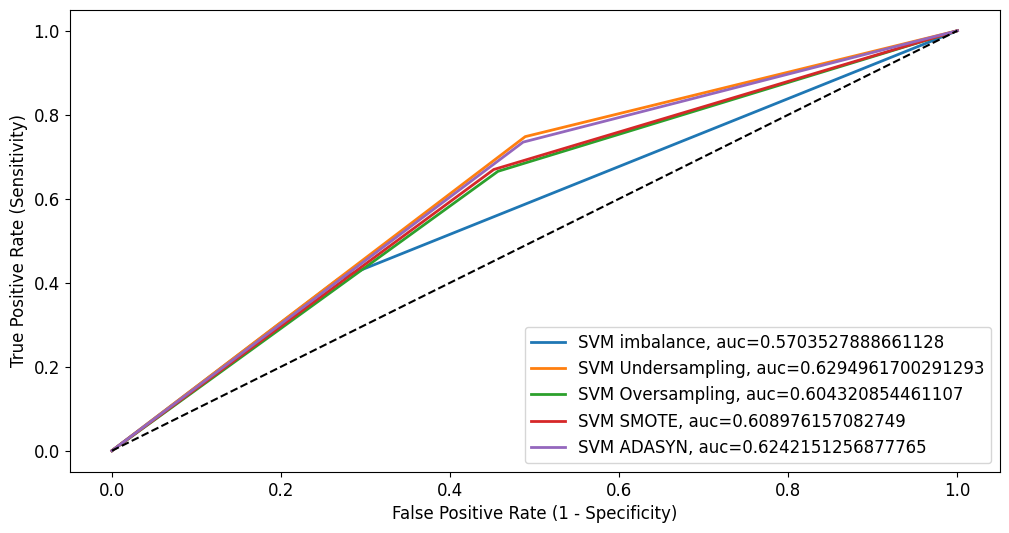

In [284]:
 # Support Vector Machines (SVM)
SVMmodels = []

SVMmodels.append(('SVM imbalance', SVC(gamma='auto'),X_train,y_train,X_test,y_test))
SVMmodels.append(('SVM Undersampling', SVC(gamma='auto'),X_train_rus,y_train_rus,X_test,y_test))
SVMmodels.append(('SVM Oversampling', SVC(gamma='auto'),X_train_ros,y_train_ros,X_test,y_test))
SVMmodels.append(('SVM SMOTE', SVC(gamma='auto'),X_train_smote,y_train_smote,X_test,y_test))
SVMmodels.append(('SVM ADASYN', SVC(gamma='auto'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(SVMmodels)

Performance measures of various classifiers

In [285]:
data = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst,
       'Kappa Stat' : kappa_lst
       }



print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data)
performance_df = performance_df.round(3)
finaltable = performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)
finaltable

Performance measures of various classifiers: 



,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test,Kappa Stat
16,SVM Undersampling,0.597,0.629,0.466,0.748,0.574,0.229
19,SVM ADASYN,0.594,0.624,0.463,0.735,0.568,0.221
18,SVM SMOTE,0.592,0.609,0.458,0.670,0.544,0.198
6,RF Undersampling,0.616,0.619,0.479,0.630,0.544,0.223
17,SVM Oversampling,0.588,0.604,0.454,0.665,0.540,0.190
11,KNN Undersampling,0.600,0.607,0.463,0.630,0.534,0.198
14,KNN ADASYN,0.592,0.596,0.455,0.609,0.520,0.179
12,KNN Oversampling,0.591,0.595,0.453,0.609,0.519,0.176
9,RF ADASYN,0.624,0.610,0.485,0.557,0.518,0.212
13,KNN SMOTE,0.594,0.594,0.455,0.596,0.516,0.177


In [287]:
!pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.9 kB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/250.9 kB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/250.9 kB 1.4 MB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 525.1 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 525.1 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/250.9 kB 425.1 kB/s eta 0:00:01
   ---------------------------------- --- 225.3/250.9 kB 689.2 kB/s eta 0:00:01
   ---------------------------------- --- 225.3/250.9 kB 689.2 kB/s eta 0:00:01
   -------------------------------------  245.8/250.9 kB 628.1 kB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 570.3 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [288]:
# Export the DataFrame to an Excel file
finaltable.to_excel('my_table.xlsx', index=False)

After training each of the models, above result were obtained.

Looking at the ROC graphs we see SVM and RF in any balancing technique have both relatively good capture True Positives. This means we capture more Vitamin A supp use. So SVM and RF with any balnacing technique is our final model, as this gives highest F1 score of 54.4% and above on test datasets.

Plotting Accuracy